# Introduction

### State Objective Here:
        Pinpoint any patterns that can potentially spot potential big winners so we can forcast 2017's
        advertising campaign success.
    
### State Goals Here:
        Transform the raw data into clean data
        Narrow down and select a sensible time period that could answer 2017's advertising campaign
        Analyze what platforms are the most (and least) profitable in regional and global sales
        Also analyze what kind of influence does a genre (along with a user & critic score) have on sales
    
### Initial Questions:
        Can we identify clear, different eras of video games played globally?
        Which platforms are leading in sales? Which aren't?
        What can be said for the most profitable genres and or platforms?

# Loading the Library

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math as mt
import seaborn as sns
from scipy import stats as st
import pandas as pd

# Loading the Dataset

In [2]:
df = pd.read_csv('/datasets/games.csv')

# Data Preprocessing - Fix & Enrich

Initially, I explore the data's first few sample lines and took note of a few things (missing values, "tbd" filler value, headers) down below.

In [3]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5788,SD Gundam G Generation: Overworld,PSP,2012.0,Strategy,0.00,0.00,0.31,0.00,NaN,NaN,NaN
11473,NBA 10: The Inside,PSP,2009.0,Sports,0.07,0.00,0.00,0.01,69.0,3,E
9901,Jaws: Ultimate Predator,3DS,2011.0,Action,0.11,0.00,0.00,0.01,NaN,tbd,M
14158,Marines: Modern Urban Combat,Wii,2010.0,Shooter,0.03,0.00,0.00,0.00,NaN,tbd,T
6041,"Sakura Wars 4: Koi Seyo,Otome",DC,2002.0,Adventure,0.00,0.00,0.29,0.00,NaN,NaN,NaN
5773,Pandora's Tower,Wii,2011.0,Role-Playing,0.11,0.10,0.08,0.02,73.0,8,T
3787,X-Men Legends,GC,2004.0,Role-Playing,0.41,0.11,0.00,0.01,81.0,8.5,T
3145,Tom Clancy's Rainbow Six,N64,1999.0,Shooter,0.48,0.15,0.00,0.01,NaN,NaN,NaN
14848,Clannad,X360,2008.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
11175,Digimon World 4,GC,2005.0,Role-Playing,0.07,0.02,0.00,0.00,55.0,8.1,E


I ensured to make all columns uniform by making them all lowercase.

In [4]:
df = df.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    }
)

I fixed and enriched some of the columns (Name, Release Year, Genre, and from Critic Score to Rating) by addressing the missing values and data types.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
mis_values = df.isnull().sum().to_frame('missing_values')
mis_values['%'] = round(df.isnull().sum()/len(df), 3)
mis_values.sort_values(by='%', ascending=False)

,missing_values,%
critic_score,8578,0.513
rating,6766,0.405
user_score,6701,0.401
year_of_release,269,0.016
name,2,0.000
platform,0,0.000
genre,2,0.000
na_sales,0,0.000
eu_sales,0,0.000
jp_sales,0,0.000


In [8]:
df.duplicated().sum()

0

I changed the categorical columns to their new data type, and dropped the two games that didn't have a name provided.

In [9]:
df['name'].isna().sum()

2

In [10]:
df['name'] = df['name'].astype(str)
df['platform'] = df['platform'].astype(str)

In [11]:
df['name'].isna().sum()


0

I also replace the NaN values with 0s for both score columns because there may have not been enough data for certain games or maybe users didn't want to give a rating just yet for the game (i.e. doesn't have enough hours played on the game) at the time of response.

In [12]:
df['critic_score'] = df['critic_score'].fillna(0) #this replaces the NaN values
df['critic_score'].unique()
#maybe I should create an avg mean for the 0 scores?

array([76.,  0., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [13]:
df['user_score'] = df['user_score'].fillna(-1) #this replaces the NaN values
df['user_score'] = df['user_score'].replace('tbd', -1)
df['user_score'] = df['user_score'].replace(-1, 0)
df['user_score'] = df['user_score'].astype(float)
df['user_score'].unique()

#maybe I should create an avg mean for the 0 scores?

array([8. , 0. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

There are 269 games that have missing game year releases so, I decided to replace the missing values with a mean year estimate.

In [14]:
df['year_of_release'].value_counts(dropna=False)

#Although, maybe I should use a wikipedia web api to potential retrive most if not all of the games' missing said values.??

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [15]:
df.dropna(axis=0, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9768 entries, 0 to 16706
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9768 non-null   object 
 1   platform         9768 non-null   object 
 2   year_of_release  9768 non-null   float64
 3   genre            9768 non-null   object 
 4   na_sales         9768 non-null   float64
 5   eu_sales         9768 non-null   float64
 6   jp_sales         9768 non-null   float64
 7   other_sales      9768 non-null   float64
 8   critic_score     9768 non-null   float64
 9   user_score       9768 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 915.8+ KB


In [17]:
df['year_of_release'].value_counts(dropna=False)

2009.0    1011
2008.0     981
2007.0     821
2010.0     799
2005.0     706
2011.0     703
2006.0     678
2002.0     655
2003.0     613
2004.0     598
2012.0     355
2014.0     345
2001.0     339
2013.0     316
2015.0     315
2016.0     280
2000.0     148
1999.0      42
1998.0      32
1997.0      19
1996.0       7
1992.0       2
1994.0       1
1985.0       1
1988.0       1
Name: year_of_release, dtype: int64

I explored the unique quantity of platforms to get an idea of which platforms has the most games.

In [18]:
df['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [19]:
df['platform'].value_counts()

PS2     1456
DS      1255
X360    1030
Wii      977
PS3      935
PC       757
XB       714
PSP      536
GBA      514
GC       457
PS4      255
3DS      223
PS       204
XOne     186
PSV      150
WiiU     105
DC        14
Name: platform, dtype: int64

I also explore the genres uniqueness, changed its datatype to string, and replaced & categorized the missing values as "Other"

In [20]:
df['genre'] = df['genre'].fillna('Other')
df['genre'] = df['genre'].astype(str)
df['genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [21]:
df['genre'].value_counts()

Action          2146
Sports          1478
Shooter          996
Misc             862
Racing           856
Role-Playing     770
Platform         561
Simulation       559
Adventure        440
Fighting         432
Puzzle           336
Strategy         332
Name: genre, dtype: int64

Likewise with the genre, I did the same for the rating's uniqueness, changed its datatype to string, and replaced & categorized the missing values as "RP" (Rating Pending). To which I see there are 6,766 "RP" ratings, which is a lot. I wonder how long does it take for a rating to be considered approved for a game.

In [22]:
df['rating'] = df['rating'].fillna('RP')
df['rating'] = df['rating'].astype(str)
df['rating'].unique()

array(['E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [23]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

I reprinted the dataframe's general info table and see that the dataframe's shape is uniform.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9768 entries, 0 to 16706
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9768 non-null   object 
 1   platform         9768 non-null   object 
 2   year_of_release  9768 non-null   float64
 3   genre            9768 non-null   object 
 4   na_sales         9768 non-null   float64
 5   eu_sales         9768 non-null   float64
 6   jp_sales         9768 non-null   float64
 7   other_sales      9768 non-null   float64
 8   critic_score     9768 non-null   float64
 9   user_score       9768 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 915.8+ KB


In [25]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9759,Touch My Katamari,PSV,2011.0,Puzzle,0.07,0.03,0.00,0.02,69.0,7.4,E10+
15290,Geon Cube,Wii,2009.0,Puzzle,0.02,0.00,0.00,0.00,0.0,0.0,E
10713,The BIGS 2,PSP,2009.0,Sports,0.09,0.00,0.00,0.01,67.0,0.0,E10+
9311,LEGO The Lord of the Rings,DS,2012.0,Action,0.00,0.12,0.00,0.01,0.0,0.0,E10+
14104,Secret Files 2: Puritas Cordis,PC,2009.0,Adventure,0.00,0.03,0.00,0.00,64.0,7.1,T
9355,Retro Atari Classics,DS,2005.0,Misc,0.12,0.00,0.00,0.01,51.0,3.7,E
10476,Gretzky NHL,PSP,2005.0,Sports,0.10,0.00,0.00,0.01,61.0,7.4,E
4152,Unreal Tournament III,X360,2008.0,Shooter,0.25,0.17,0.01,0.05,82.0,7.6,M
7493,X2: Wolverine's Revenge,XB,2003.0,Platform,0.15,0.04,0.00,0.01,58.0,6.4,T
7037,Carnival Island,PS3,2011.0,Misc,0.13,0.06,0.00,0.04,66.0,5.2,E


# Data Analysis (EDA & SDA)

Now that the data wrangling process is completed, we can began exploring some inital questions and tackle some goals that were stated in the beginning.

In [26]:
df.describe() #sales are in millions

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000
mean,2007.581695,0.318958,0.183255,0.046468,0.064779,55.815008,5.385145
std,4.099819,0.826136,0.587493,0.242874,0.230047,29.879805,3.329471
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,47.000000,2.000000
50%,2008.000000,0.120000,0.040000,0.000000,0.020000,66.000000,6.900000
75%,2010.000000,0.300000,0.150000,0.000000,0.050000,77.000000,8.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000,9.700000


In [27]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
11141,The Weakest Link,PS,2001.0,Misc,0.05,0.03,0.00,0.01,63.0,7.2,E,0.09
14648,Lords of the Fallen,PC,2014.0,Role-Playing,0.00,0.03,0.00,0.00,73.0,6.9,M,0.03
11916,Elements of Destruction,DS,2007.0,Strategy,0.07,0.00,0.00,0.01,0.0,0.0,E10+,0.08
5924,Capcom Classics Collection Remixed,PSP,2006.0,Misc,0.27,0.00,0.00,0.02,72.0,7.0,T,0.29
16630,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
10162,Family Game Night 4: The Game Show,PS3,2011.0,Misc,0.08,0.02,0.00,0.01,0.0,0.0,E,0.11
8123,American Chopper 2: Full Throttle,PS2,2005.0,Racing,0.09,0.07,0.00,0.02,0.0,8.1,T,0.18
2007,Super Princess Peach,DS,2005.0,Platform,0.70,0.05,0.21,0.07,75.0,7.6,E,1.03
8331,Bee Movie Game,X360,2007.0,Action,0.16,0.00,0.00,0.01,71.0,5.8,E,0.17
4349,WWE WrestleMania 21,XB,2005.0,Fighting,0.34,0.10,0.00,0.02,56.0,6.9,T,0.46


Starting off with a scatterplot, this will give us an idea of the range of years each game has been released in and what each game made in sales across all regions. There also seems to be a relatively dense cluster (or higher peaks) of higher profits for a game between the year 2005 - 2016, but for the campaign, let's go forward with the few recent years from 2012 until latest.

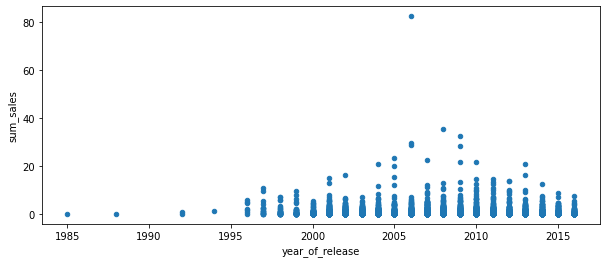

In [28]:
df.plot(x='year_of_release', y='sum_sales', kind='scatter', figsize=[10, 4])
plt.show()

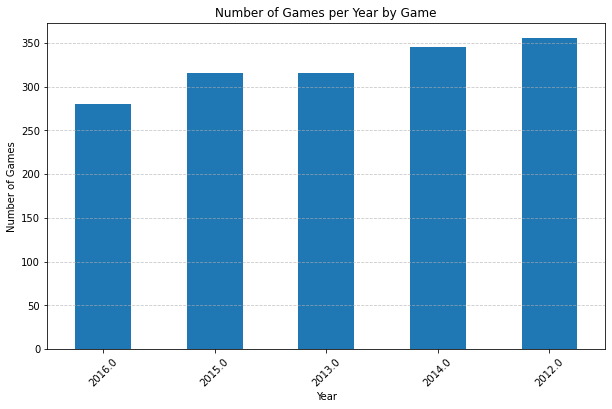

In [29]:
gaming_era = df[df['year_of_release'] >= 2012]
game_yr = gaming_era['year_of_release'].value_counts(ascending=True)

game_yr.plot(figsize=(10,6), kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of Games per Year by Game')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [30]:
gaming_era.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
2946,The LEGO Movie Videogame,3DS,2014.0,Action,0.28,0.31,0.05,0.05,0.0,5.4,E10+,0.69
1168,Kingdom Hearts 3D: Dream Drop Distance,3DS,2012.0,Action,0.88,0.26,0.34,0.10,75.0,8.2,E10+,1.58
7662,Dungeon Hunter Alliance,PSV,2012.0,Action,0.07,0.09,0.00,0.03,49.0,6.4,T,0.19
2718,Titanfall 2,PS4,2016.0,Shooter,0.34,0.25,0.05,0.12,89.0,8.4,M,0.76
5689,LEGO Marvel's Avengers,X360,2016.0,Action,0.18,0.11,0.00,0.03,0.0,5.7,E10+,0.32
449,Resident Evil 6,PS3,2012.0,Shooter,0.88,0.94,0.88,0.40,74.0,5.4,M,3.10
2603,Rare Replay,XOne,2015.0,Misc,0.49,0.22,0.01,0.07,84.0,7.7,M,0.79
1721,Resident Evil: Operation Raccoon City,PS3,2012.0,Action,0.48,0.24,0.36,0.10,52.0,4.9,M,1.18
9852,Tony Hawk's Pro Skater 5,XOne,2015.0,Sports,0.09,0.02,0.00,0.01,39.0,2.1,T,0.12
3296,Tearaway,PSV,2013.0,Adventure,0.14,0.34,0.00,0.14,87.0,8.9,E,0.62


# Let's explore which platforms had the greatest total sales and the ones with the least (or now has 0) sales.

## Top Selling Platforms

In [31]:
top_selling_games = df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(3)
top_selling_games

platform
PS2     1044.25
X360     900.39
PS3      837.39
Name: sum_sales, dtype: float64

PS2 has made a total of $1044.25 dollars in the past few decades until now
X360 has made a total of $900.39 million dollars in the past few decades until now
PS3 has made a total of $837.39 million dollars in the past few decades until now


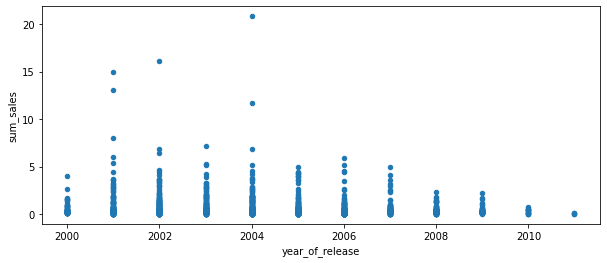

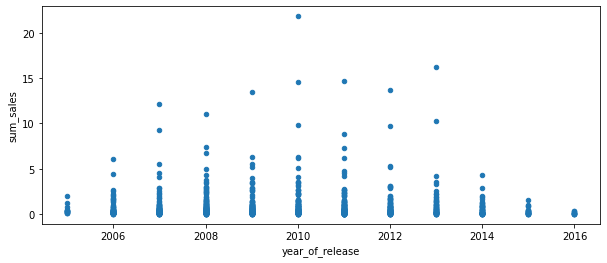

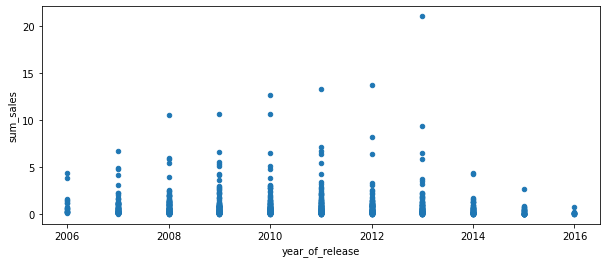

In [32]:
#PS2 Platform

ps2_sales = df[df['platform'] == 'PS2']
ps2_sum_sales = ps2_sales['sum_sales'].sum()
print(f'PS2 has made a total of ${ps2_sum_sales} dollars in the past few decades until now')

ps2_hist = df[df['platform'] == 'PS2']
ps2_hist.plot(x='year_of_release', y='sum_sales', kind='scatter', figsize=[10, 4])



#X360 Platform

x360_sales = df[df['platform'] == 'X360']
x360_sum_sales = x360_sales['sum_sales'].sum()
print(f'X360 has made a total of ${x360_sum_sales:.2f} million dollars in the past few decades until now')

x360_hist = df[df['platform'] == 'X360']
x360_hist.plot(x='year_of_release', y='sum_sales', kind='scatter', figsize=[10, 4])



#PS3 Platform

ps3_sales = df[df['platform'] == 'PS3']
ps3_sum_sales = ps3_sales['sum_sales'].sum()
print(f'PS3 has made a total of ${ps3_sum_sales:.2f} million dollars in the past few decades until now')

ps3_hist = df[df['platform'] == 'PS3']
ps3_hist.plot(x='year_of_release', y='sum_sales', kind='scatter', figsize=[10, 4])

plt.show()

## Least selling platforms

It seems like the least selling platforms are defintely making hardly less than a million after a few years of competition. This could be due to discontinuing the platform all together due to the times or an upgraded model replaced it to even regional based popularity since maybe one or two regions loved it and the others weren't excited for it.

In [33]:
bottom_selling_games = df.groupby('platform')['sum_sales'].sum().sort_values(ascending=True).head(3)
bottom_selling_games

platform
DC       4.55
PSV     34.67
WiiU    67.61
Name: sum_sales, dtype: float64

In [34]:
#DC Platform

dc_sales = df[df['platform'] == 'DC']
dc_sum_sales = dc_sales['sum_sales'].sum()
print(f'DC has made a total of ${dc_sum_sales:.2f} million dollars in the past few decades until now')

#PSV Platform

psv_sales = df[df['platform'] == 'PSV']
psv_sum_sales = psv_sales['sum_sales'].sum()
print(f'PSV has made a total of ${psv_sum_sales:.2f} million dollars in the past few decades until now')

#WiiU Platform

wiiU_sales = df[df['platform'] == 'WiiU']
wiiU_sum_sales = wiiU_sales['sum_sales'].sum()
print(f'WiiU has made a total of ${wiiU_sum_sales:.2f} million dollars in the past few decades until now')

DC has made a total of $4.55 million dollars in the past few decades until now
PSV has made a total of $34.67 million dollars in the past few decades until now
WiiU has made a total of $67.61 million dollars in the past few decades until now


# Narrowing & Forecasting the Data

Now that we spent some time analyzing the overall elements of the data, we can now narrow the data to a specific time frame to closely identify patterns that could help determine a game's success or not. I considered the previous decade of games, between 2006-2016, as a solid framework to dive further into in order to create a 2017 forecast model.

In [35]:
campaign_range = df[df['year_of_release'] >=2012]
campaign_range.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
235,Luigi's Mansion: Dark Moon,3DS,2013.0,Action,1.80,1.39,1.11,0.29,86.0,8.4,E,4.59
16300,Barbie and Her Sisters Puppy Rescue,WiiU,2015.0,Action,0.00,0.01,0.00,0.00,0.0,2.8,E,0.01
3453,Shin Megami Tensei IV,3DS,2013.0,Role-Playing,0.28,0.00,0.27,0.03,83.0,8.3,M,0.58
127,Assassin's Creed III,PS3,2012.0,Action,2.64,2.52,0.16,1.12,85.0,6.9,M,6.44
7945,Pro Evolution Soccer 2014,3DS,2013.0,Action,0.00,0.00,0.19,0.00,0.0,0.0,E,0.19
8607,Angry Birds Star Wars,XOne,2013.0,Strategy,0.11,0.04,0.00,0.02,53.0,6.9,E,0.17
11817,Escape Dead Island,PS3,2014.0,Action,0.04,0.03,0.00,0.01,40.0,3.5,M,0.08
2012,The Legend of Zelda: Twilight Princess HD,WiiU,2016.0,Action,0.56,0.30,0.08,0.09,86.0,8.4,T,1.03
12776,Tokyo Twilight Ghost Hunters,PS3,2014.0,Role-Playing,0.03,0.00,0.02,0.01,64.0,6.4,T,0.06
10647,Murdered: Soul Suspect,X360,2014.0,Action,0.06,0.03,0.00,0.01,0.0,7.2,M,0.10


In [36]:
campaign_range.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1611 non-null   object 
 1   platform         1611 non-null   object 
 2   year_of_release  1611 non-null   float64
 3   genre            1611 non-null   object 
 4   na_sales         1611 non-null   float64
 5   eu_sales         1611 non-null   float64
 6   jp_sales         1611 non-null   float64
 7   other_sales      1611 non-null   float64
 8   critic_score     1611 non-null   float64
 9   user_score       1611 non-null   float64
 10  rating           1611 non-null   object 
 11  sum_sales        1611 non-null   float64
dtypes: float64(8), object(4)
memory usage: 163.6+ KB


In [37]:
title = campaign_range['name'].nunique()
platform = campaign_range['platform'].nunique()
genre = campaign_range['genre'].nunique()
campaign_shape = campaign_range.shape

print(f'This leaves us with {campaign_shape[0]} rows worth of data narrowed down to:')
print(f'> {title} unique titles')
print(f'> {platform} unique platforms')
print(f'> {genre} unique genres')

This leaves us with 1611 rows worth of data narrowed down to:
> 771 unique titles
> 11 unique platforms
> 12 unique genres


# Which platforms are leading in sales? Which ones are growing or shrinking?

In [38]:
top_selling_games = campaign_range.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head()
top_selling_games

platform
PS3     247.90
PS4     245.94
X360    213.12
XOne    134.06
3DS      85.56
Name: sum_sales, dtype: float64

In [39]:
bottom_selling_games = campaign_range.groupby('platform')['sum_sales'].sum().sort_values(ascending=True).head()
bottom_selling_games

platform
PSP     1.32
DS      3.37
PSV    30.79
Wii    31.09
PC     54.95
Name: sum_sales, dtype: float64

# Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms?

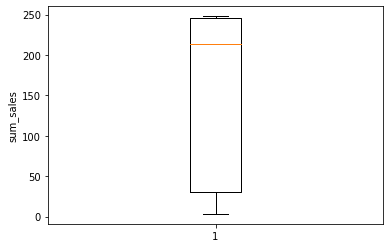

<Figure size 720x1440 with 0 Axes>

In [40]:
campaign_range = df[df['year_of_release'] >=2012]

ps3 = campaign_range[campaign_range['platform'] == 'PS3']['sum_sales'].sum()
x360 = campaign_range[campaign_range['platform'] == 'X360']['sum_sales'].sum()
wii = campaign_range[campaign_range['platform'] == 'Wii']['sum_sales'].sum()
ds = campaign_range[campaign_range['platform'] == 'DS']['sum_sales'].sum()
ps4 = campaign_range[campaign_range['platform'] == 'PS4']['sum_sales'].sum()

g_platforms = [ps3, x360, wii, ds, ps4]
plt.boxplot(g_platforms)
#plt.xticks([1, 2, 3, 4, 5]['PS3', 'X360', 'Wii', 'DS', 'PS4'])
plt.ylabel('sum_sales')
fig = plt.figure(figsize=(10, 20))
plt.show()

#Idk why my boxplot isn't showing all the platforms I want displayed, need to come back to later and delete this comment

# Game Reviews VS Sales

If we were to analyze the potential influence both user and critic reviews may have on sales, particularly with the X360 platform, there seems to be neither a strong positive or negative correlation between both type of reviews versus sales. This is clearly shown, visually and also numerically with the correlation table as the relationship between the reviews versus sales range between 0.31 - 0.17 and thus closer to 0 than to 1 or -1.

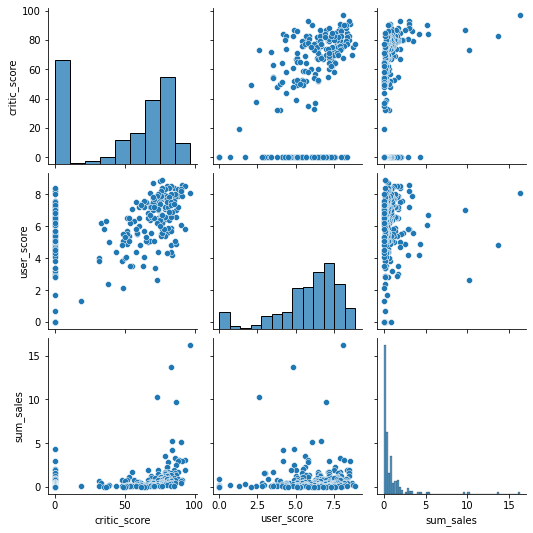

In [41]:
x360 = campaign_range[campaign_range['platform'] == 'X360']
sns.pairplot(x360[['critic_score', 'user_score', 'sum_sales']])
plt.show()

In [42]:
x360[['critic_score', 'user_score', 'sum_sales']].corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.487589,0.271501
user_score,0.487589,1.000000,0.070149
sum_sales,0.271501,0.070149,1.000000


#  Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

Now, let's take a step back and see which genres has had the most games produced in the form of a bar graph because its clear that numerically it was **Action** earlier during our data wrangling, and before we refined our forecast data to 2012 - 2016. 

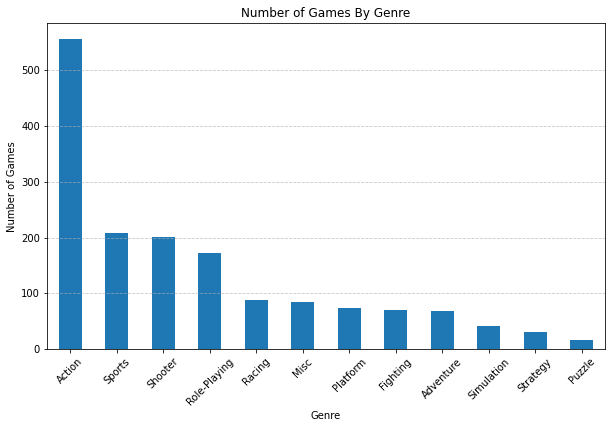

In [43]:
genre = campaign_range['genre'].value_counts()
genre

genre.plot(figsize=(10,6), kind='bar', stacked=True)
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Number of Games By Genre')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Now in terms of sum of sales by genre, its evident, the **Shooter genre** has some reach in terms of reaching beyond, 3.5 million in sales without any outliers; although, the **Action genre** has clearly shown again that (just like the bar graph) it continues to be in first place as it has reached over 20 million in sales due to one outlier game.

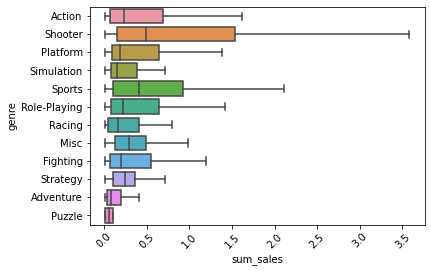

In [44]:
sns.boxplot(data=campaign_range, y='genre', x='sum_sales', showfliers=False)
plt.xticks(rotation=45)
plt.show()

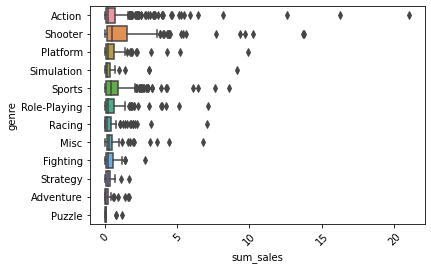

In [45]:
sns.boxplot(data=campaign_range, y='genre', x='sum_sales', showfliers=True)
plt.xticks(rotation=45)
plt.show()

Here are further comparisons of the sales by genre, with the former showcasing the total sales by genre and the latter showcasing the average sales by genre.

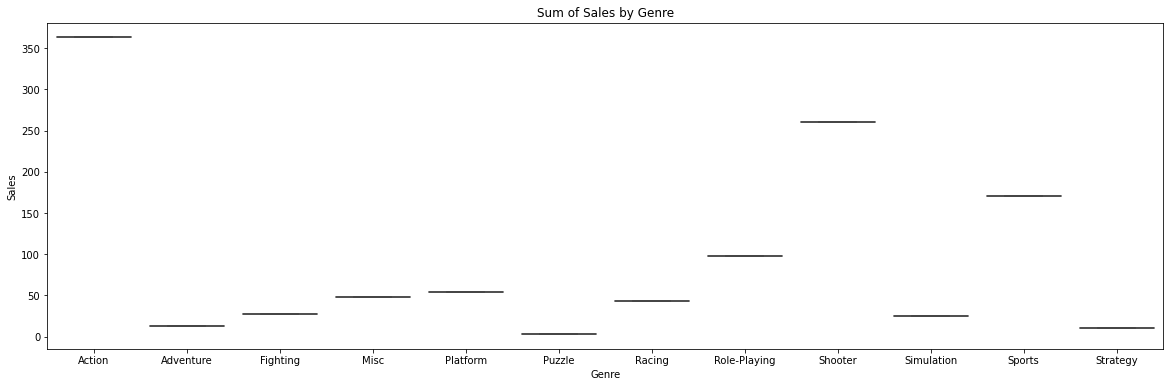

In [46]:
sum_sales_genre = campaign_range.groupby('genre')['sum_sales'].sum().reset_index()

plt.figure(figsize=(20, 6))
sns.boxplot(data=sum_sales_genre, x='genre', y='sum_sales', showfliers=True)
plt.title('Sum of Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

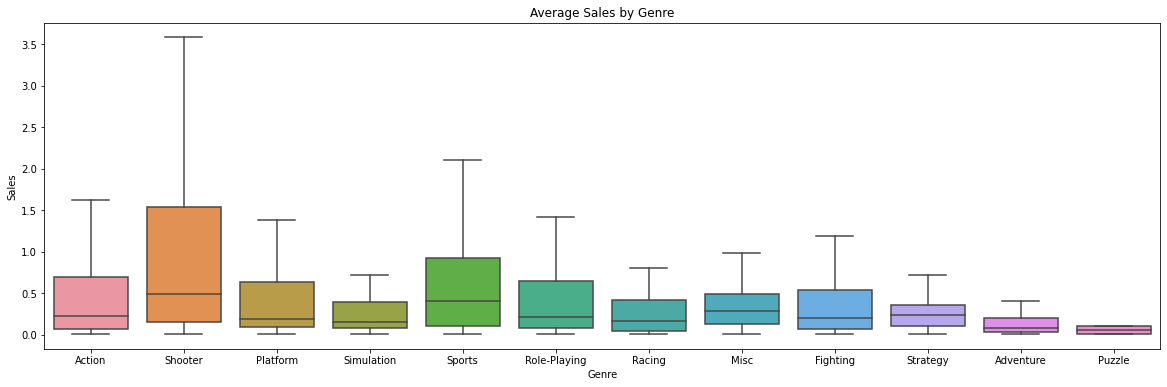

In [47]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=campaign_range, x='genre', y='sum_sales', showfliers=False)
plt.title('Average Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

# User profile for each region

# Regional Platform Variations

When comparing the different variations amongst the platforms for each region, Nintendo's DS platform is in each regions' top 3. Another Nintendo platform, Wii, is also top 3 for both Japanese and European regions. Yet interestingly, the Sony PS3 is in all regions Top 5, in the final placeholder.

# Japan's Platform Line-up

In [48]:
jp_top_platforms = campaign_range.groupby(['jp_sales'])['platform'].value_counts().head()
jp_top_platforms

jp_sales  platform
0.0       PC          185
          X360        178
          XOne        168
          PS4         125
          PS3         118
Name: platform, dtype: int64

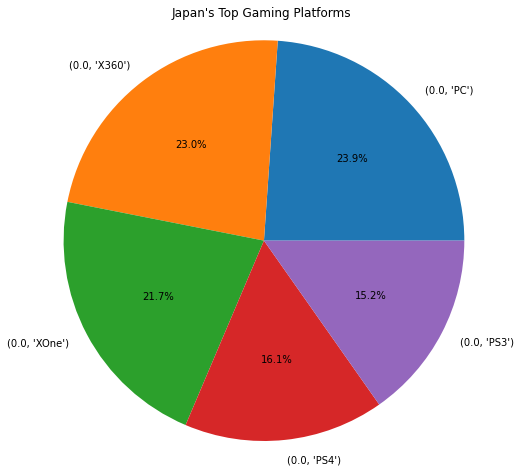

In [49]:
plt.figure(figsize=(8, 8))
plt.pie(jp_top_platforms, labels=jp_top_platforms.index, autopct='%1.1f%%') #startangle=140
plt.axis('equal')
plt.title('Japan\'s Top Gaming Platforms')
plt.show()

# Europe's Platform Line-up

In [50]:
eu_top_platforms = campaign_range.groupby(['eu_sales'])['platform'].value_counts().head()
eu_top_platforms

eu_sales  platform
0.0       PS3         47
          PS4         41
          PSV         38
          3DS         35
          XOne        18
Name: platform, dtype: int64

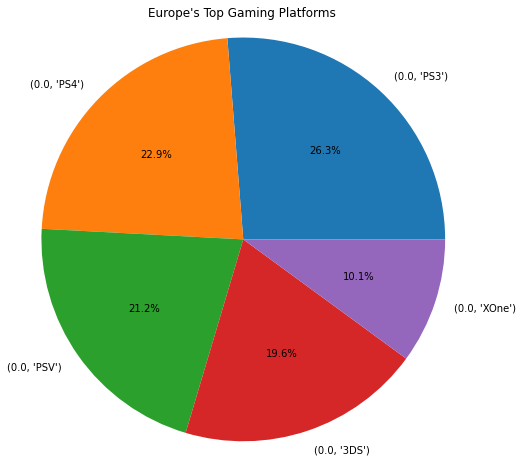

In [51]:
plt.figure(figsize=(8, 8))
plt.pie(eu_top_platforms, labels=eu_top_platforms.index, autopct='%1.1f%%') #startangle=140
plt.axis('equal')
plt.title('Europe\'s Top Gaming Platforms')
plt.show()

# North America's Platform Line-up

In [52]:
na_top_platforms = campaign_range.groupby(['na_sales'])['platform'].value_counts().head()
na_top_platforms

na_sales  platform
0.0       PC          81
          PSV         44
          PS4         37
          PS3         36
          3DS         28
Name: platform, dtype: int64

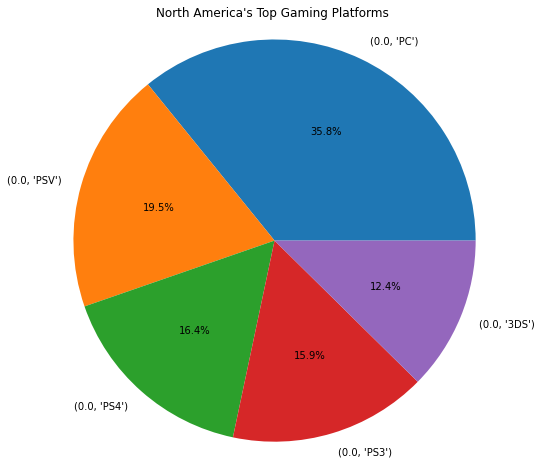

In [53]:
plt.figure(figsize=(8, 8))
plt.pie(na_top_platforms, labels=na_top_platforms.index, autopct='%1.1f%%') #startangle=140
plt.axis('equal')
plt.title('North America\'s Top Gaming Platforms')
plt.show()

# Regional Genre Variations

Reiging as the #1 champ for all regions is the **Action** genre, although all 3 regions also share **Sports & Misc** as another common genre in various placeholders, respectively. As for **Role-Playing & Adventure**, the European and North American Regions tends to favors this genre over Japan; however, maybe Japan has a lone preference for **Shooter**-based games

# Japan's Genre Line-up

In [54]:
jp_top_genres = campaign_range.groupby(['jp_sales'])['genre'].value_counts().head()
jp_top_genres

jp_sales  genre  
0.0       Action     331
          Sports     167
          Shooter    121
          Racing      66
          Misc        61
Name: genre, dtype: int64

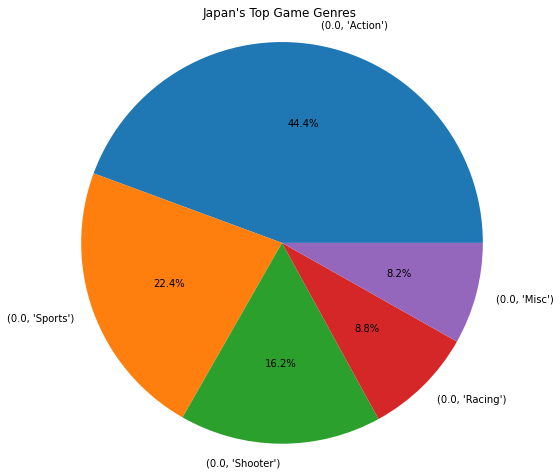

In [55]:
plt.figure(figsize=(8, 8))
plt.pie(jp_top_genres, labels=jp_top_genres.index, autopct='%1.1f%%') #startangle=140
plt.axis('equal')
plt.title('Japan\'s Top Game Genres')
plt.show()

# Europe's Genre Line-up

In [56]:
eu_top_genres = campaign_range.groupby(['eu_sales'])['genre'].value_counts().head()
eu_top_genres

eu_sales  genre       
0.0       Action          68
          Role-Playing    34
          Sports          27
          Fighting        17
          Adventure       14
Name: genre, dtype: int64

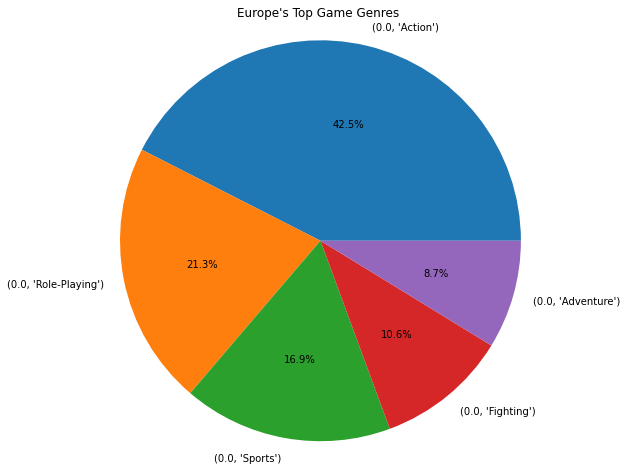

In [57]:
plt.figure(figsize=(8, 8))
plt.pie(eu_top_genres, labels=eu_top_genres.index, autopct='%1.1f%%') #startangle=140
plt.axis('equal')
plt.title('Europe\'s Top Game Genres')
plt.show()

# North America's Genre Line-up

In [58]:
na_top_genres = campaign_range.groupby(['na_sales'])['genre'].value_counts().head()
na_top_genres

na_sales  genre       
0.0       Action          110
          Sports           39
          Role-Playing     34
          Racing           23
          Adventure        16
Name: genre, dtype: int64

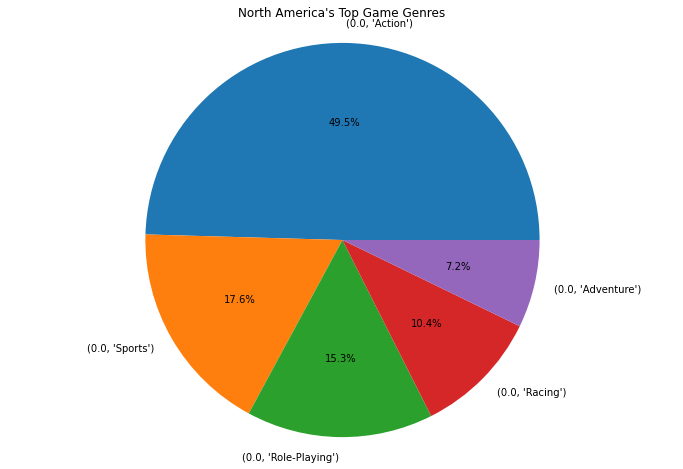

In [59]:
plt.figure(figsize=(12, 8))
plt.pie(na_top_genres, labels=na_top_genres.index, autopct='%1.1f%%') #startangle=140
plt.axis('equal')
plt.title('North America\'s Top Game Genres')
plt.show()

# Regional Rating Variations

The rating variations are quite interesting but not surprising given that the "Rating Pending" rating relatively had the most games titles out of all the genres. So its kind of expected that all regions had a portion of their games fall into the RP category. Although, Japan's region seems to have a more evenly distributed proportion amongst their top 4 categories that results in at least a 1,000 games in each rating available to each age demographic. Whereas, there's a somewhat decent pool of games each demographic can play for the European and N.American regions given most of their games, like Japan's, falls into the RP category. So I definitely think, the ratings does play a influential role in correlation to regional sales.

# Japan's Rating Line-up

In [60]:
jp_top_rating = campaign_range.groupby(['rating'])['jp_sales'].sum()
jp_top_rating

rating
E       28.33
E10+     8.19
M       21.20
T       26.02
Name: jp_sales, dtype: float64

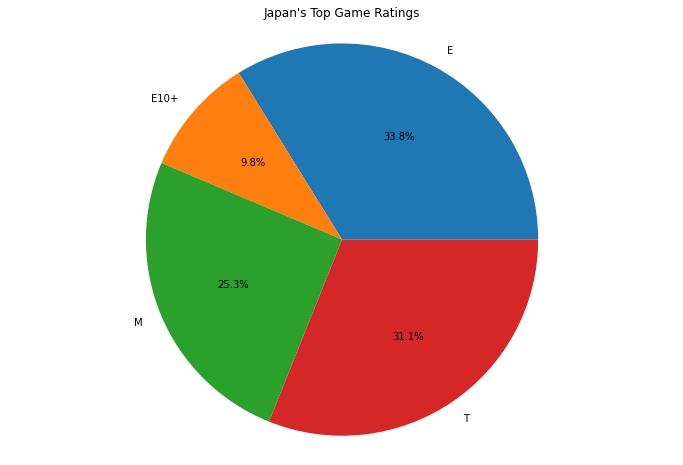

In [61]:
plt.figure(figsize=(12, 8))
plt.pie(jp_top_rating, labels=jp_top_rating.index, autopct='%1.1f%%') #startangle=140
plt.axis('equal')
plt.title('Japan\'s Top Game Ratings')
plt.show()

# Europe's Rating Line-up

In [62]:
eu_top_rating = campaign_range.groupby(['rating'])['eu_sales'].sum()
eu_top_rating

rating
E       113.03
E10+     55.37
M       193.96
T        52.96
Name: eu_sales, dtype: float64

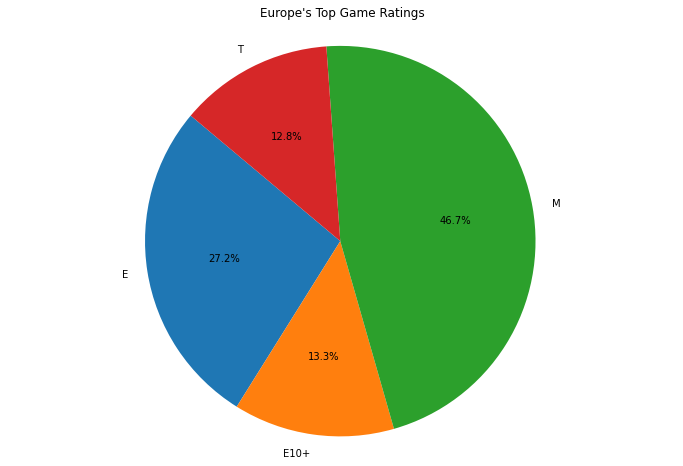

In [63]:
plt.figure(figsize=(12, 8))
plt.pie(eu_top_rating, labels=eu_top_rating.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Europe\'s Top Game Ratings')
plt.show()

# North America's Rating Line-up

In [64]:
na_top_rating = campaign_range.groupby(['rating'])['na_sales'].sum()
na_top_rating

rating
E       114.37
E10+     75.70
M       231.57
T        66.02
Name: na_sales, dtype: float64

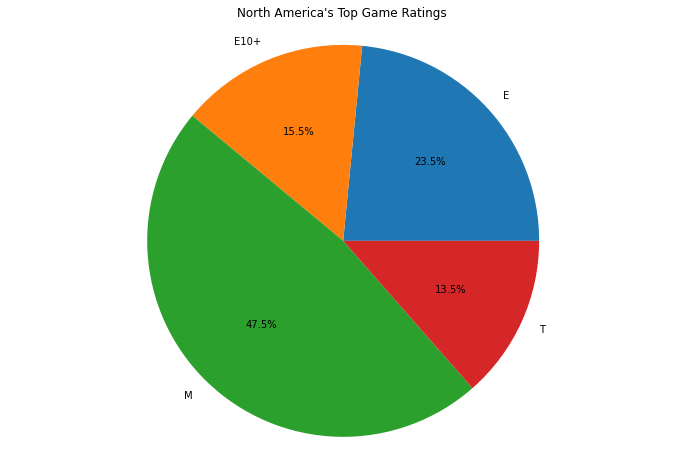

In [65]:
plt.figure(figsize=(12, 8))
plt.pie(na_top_rating, labels=na_top_rating.index, autopct='%1.1f%%') #startangle=140
plt.axis('equal')
plt.title('North America\'s Top Game Ratings')
plt.show()

# Test the Hypothesis

Now lets test two hypotheses, with the notion **that two populations are equal to each other**:
* Average user ratings of the Xbox One and PC platforms are the same.
* Average user ratings for the Action and Sports genres are different.



For the first test: Xbox == PC

* I will denote the H₀ as both platform's average user ratings are the same.
* I will denote the H₁ as both platform's average user ratings **are not the same**.

When comparing the two platform's user scores, the biggest, clear evidence was that XOne's had more a well-rounded score values compare to PC's user score values. PC's had 97 more 0 score values than XOne's pool of 0 user score values, that alone I think played more of a role with the imbalance PC had over XOne and thus resulting in the two to be **not equal, at all**. Therefore when I was considering the signifcance level, I figured if the results  is less than the p-value then its clear that one of the platforms is not equal to the other.

This same notion can be also extended towards the second hypothesis, given that the values shown for their 0 user scores are so abundant, will lead me to believe that this we can **reject** the null hypothesis: the idea that they are the same. Despite my earlier impression, I'm surprised it was rejected especially since when we compared the regional genre line-up - action and sports were the two common genres across all regions.

In [66]:
xone = campaign_range[campaign_range['platform'] == 'XOne']['user_score']
pc = campaign_range[campaign_range['platform'] == 'PC']['user_score']
alpha = 0.05

avg_equal_score = st.ttest_ind(xone, pc, equal_var = True)

print('p-value: ', avg_equal_score.pvalue)

if avg_equal_score.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.6580386274405442
We can't reject the null hypothesis


For the second test: Action != Sports

* I will denote the H₀ as both platform's average user ratings are the same.
* I will denote the H₁ as both platform's average user ratings **are not the same**.

In [67]:
action = campaign_range[campaign_range['genre'] == 'Action']['user_score']
sports = campaign_range[campaign_range['genre'] == 'Sports']['user_score']
alpha = 0.05

diff_avg_rating = st.ttest_ind(action, sports, equal_var = False)

print('p-value: ', diff_avg_rating.pvalue)

if diff_avg_rating.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  4.6143222057895024e-11
We reject the null hypothesis


# Conclusion

All in all, my observation if put simply: if we were to pinpoint any potentionally big winners for 2017's forcasted advertising campaign, without a doubt, any **action-based game coming out on the Nintendo DS or X360 with a game rating between E for everyone or T for Teens** will more than likely have a fighting chance of success, across all regions.